In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import preliz as pz
import pymc as pm


np.random.seed(123)

# Exercise 1: `our_first_model` in PyMC

In [2]:
trials = 4
theta_real = 0.35  # unknown value in a real experiment
data = pz.Bernoulli(p=theta_real).rvs(trials)

beta_params = [(1, 1), (2, 5), (20, 20)]
results = []

for alpha, beta in beta_params:
    with pm.Model() as model: 
        theta = pm.Beta('theta', alpha=alpha, beta=beta)
        y = pm.Bernoulli('y', p=theta, observed=data)
        idata = pm.sample(random_seed=123)
        results.append(idata)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.


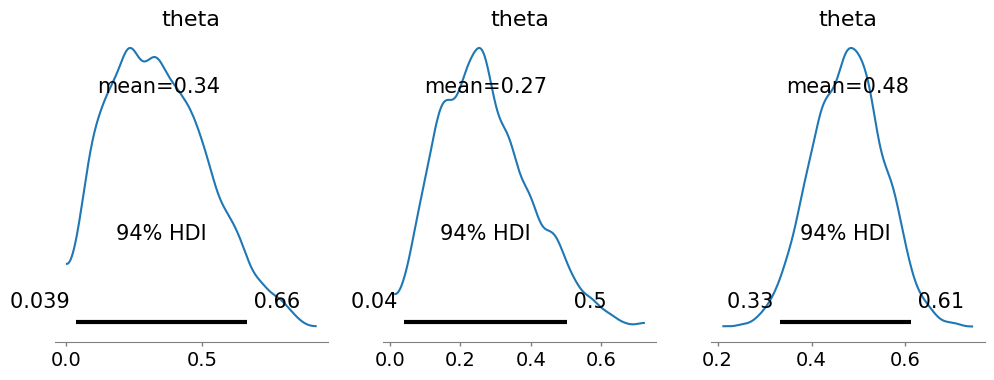

In [3]:
_, axes = plt.subplots(1, 3, figsize=(12, 4))
for idata, ax in zip(results, axes):
    az.plot_posterior(idata, ax=ax)

/Users/robert-andreidamian/.local/share/virtualenvs/bayesian-analysis-python-I2PuNA43/lib/python3.11/site-packages/arviz/plots/backends/matplotlib/forestplot.py:239: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "label_idxs" failed type inference due to: Untyped global name 'defaultdict': Cannot determine Numba type of <class 'type'>

File "../../../../.local/share/virtualenvs/bayesian-analysis-python-I2PuNA43/lib/python3.11/site-packages/arviz/plots/backends/matplotlib/forestplot.py", line 244:
        def label_idxs():
            <source elided>
                sub_labels, sub_idxs, _, _ = plotter.labels_ticks_and_vals()
                labels_to_idxs = defaultdict(list)
                ^

  @conditional_jit(forceobj=True, nopython=False)


ValueError: Cannot add edge as dest node 508 not in nodes {258, 260, 496, 144, 146, 210, 20, 18, 17, 497, 410}

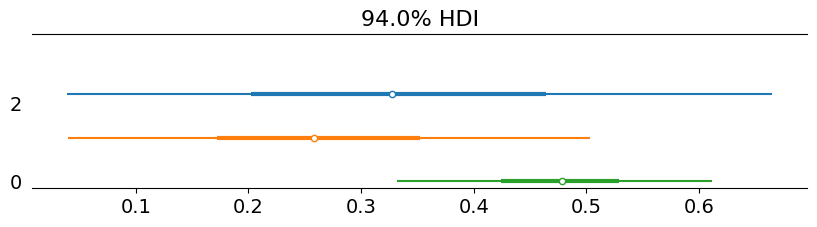

In [4]:
az.plot_forest(results, combined=True, figsize=(10, 2))

# Exercise 2: Uniform theta distributions 

In [12]:
with pm.Model() as model: 
    theta = pm.Uniform('theta', lower=0, upper=1)
    y = pm.Bernoulli('y', p=theta, observed=data)
    idata_0_1 = pm.sample(random_seed=123)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.


In [13]:
with pm.Model() as model: 
    theta = pm.Uniform('theta', lower=-1, upper=2)
    y = pm. Bernoulli('y', p=theta, observed=data)
    idata_m1_2 = pm.sample(random_seed=123)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.
There were 554 divergences after tuning. Increase `target_accept` or reparameterize.


<Axes: title={'center': 'theta'}>

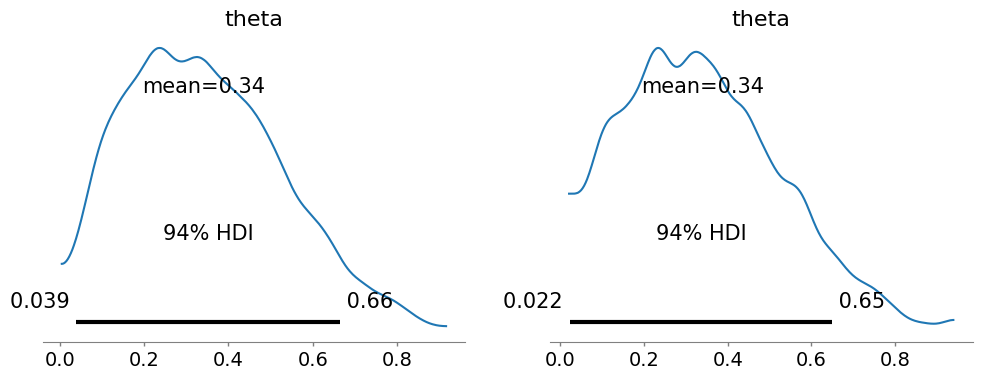

In [14]:
_, axes = plt.subplots(1, 2, figsize=(12, 4))

az.plot_posterior(idata_0_1, ax=axes[0])
az.plot_posterior(idata_m1_2, ax=axes[1])

# Exercise 3: graphviz

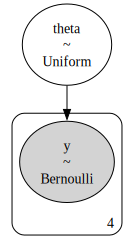

In [15]:
pm.model_to_graphviz(model)

# Exercise 4: Coal mining disasters

In [17]:
disasters_array =   \
     np.array([ 4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                   3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                   2, 2, 3, 4, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3, 0, 0,
                   1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                   0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                   3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                   0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])
start_year = 1851

111

In [26]:
with pm.Model() as model:
    mu_l = pm.Uniform('mu_l', lower=0, upper=10)
    mu_r = pm.Uniform('mu_r', lower=0, upper=mu_l)
    
    breaking_point = pm.DiscreteUniform('breaking_point', lower=0, upper=disasters_array.shape[0])
    
    left_rate = np.repeat(mu_l, breaking_point)
    right_rate = np.repeat(mu_r, (disasters_array.shape[0] - breaking_point))
    
    print(left_rate)
    rate = pm.Deterministic(
        'rate',
        pm.math.concatenate((left_rate, right_rate))
    )
    
    disasters = pm.Poisson('disasters', mu=rate, observed=disasters_array)
    trace = pm.sample(random_seed=123)


Reshape{1}.0


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [mu_l, mu_r]
>Metropolis: [breaking_point]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.


<Axes: title={'center': 'breaking_point'}>

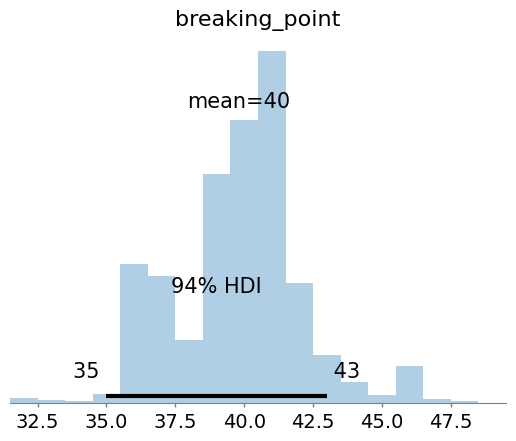

In [27]:
az.plot_posterior(trace, var_names=['breaking_point'])

<Axes: title={'center': 'mu_r'}>

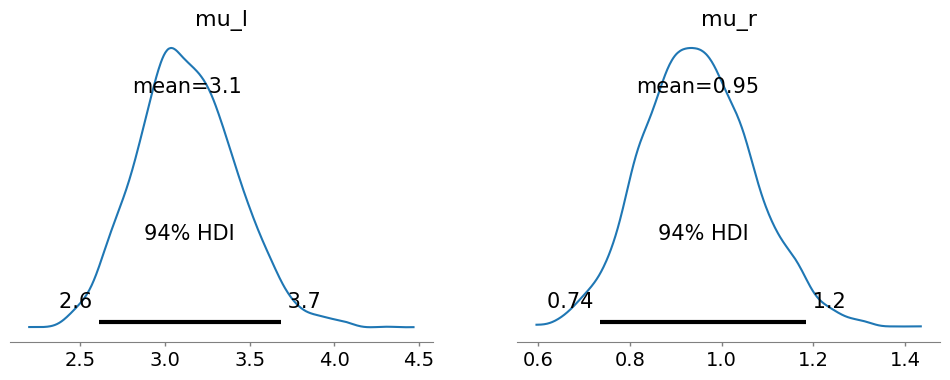

In [28]:
_, axes = plt.subplots(1, 2, figsize=(12, 4))

az.plot_posterior(trace, var_names=["mu_l"], ax=axes[0])
az.plot_posterior(trace, var_names=["mu_r"], ax=axes[1])

# Exercise 5

In [29]:
mean_values = [20, 40, 50, 60, 80]
std_values = [0.5, 1, 5, 10, 20]

results = []

data = np.loadtxt("data/model_g_data.csv")

for mu in mean_values:
    for sigma in std_values: 
        with pm.Model() as model_g:
            μ = pm.Normal('μ', mu=mu, sigma=sigma)
            σ = pm.HalfNormal('σ', sigma=5)
            Y = pm.Normal('Y', mu=μ, sigma=σ, observed=data)
            idata_g = pm.sample(random_seed=4591)
            
            results.append(idata_g)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.


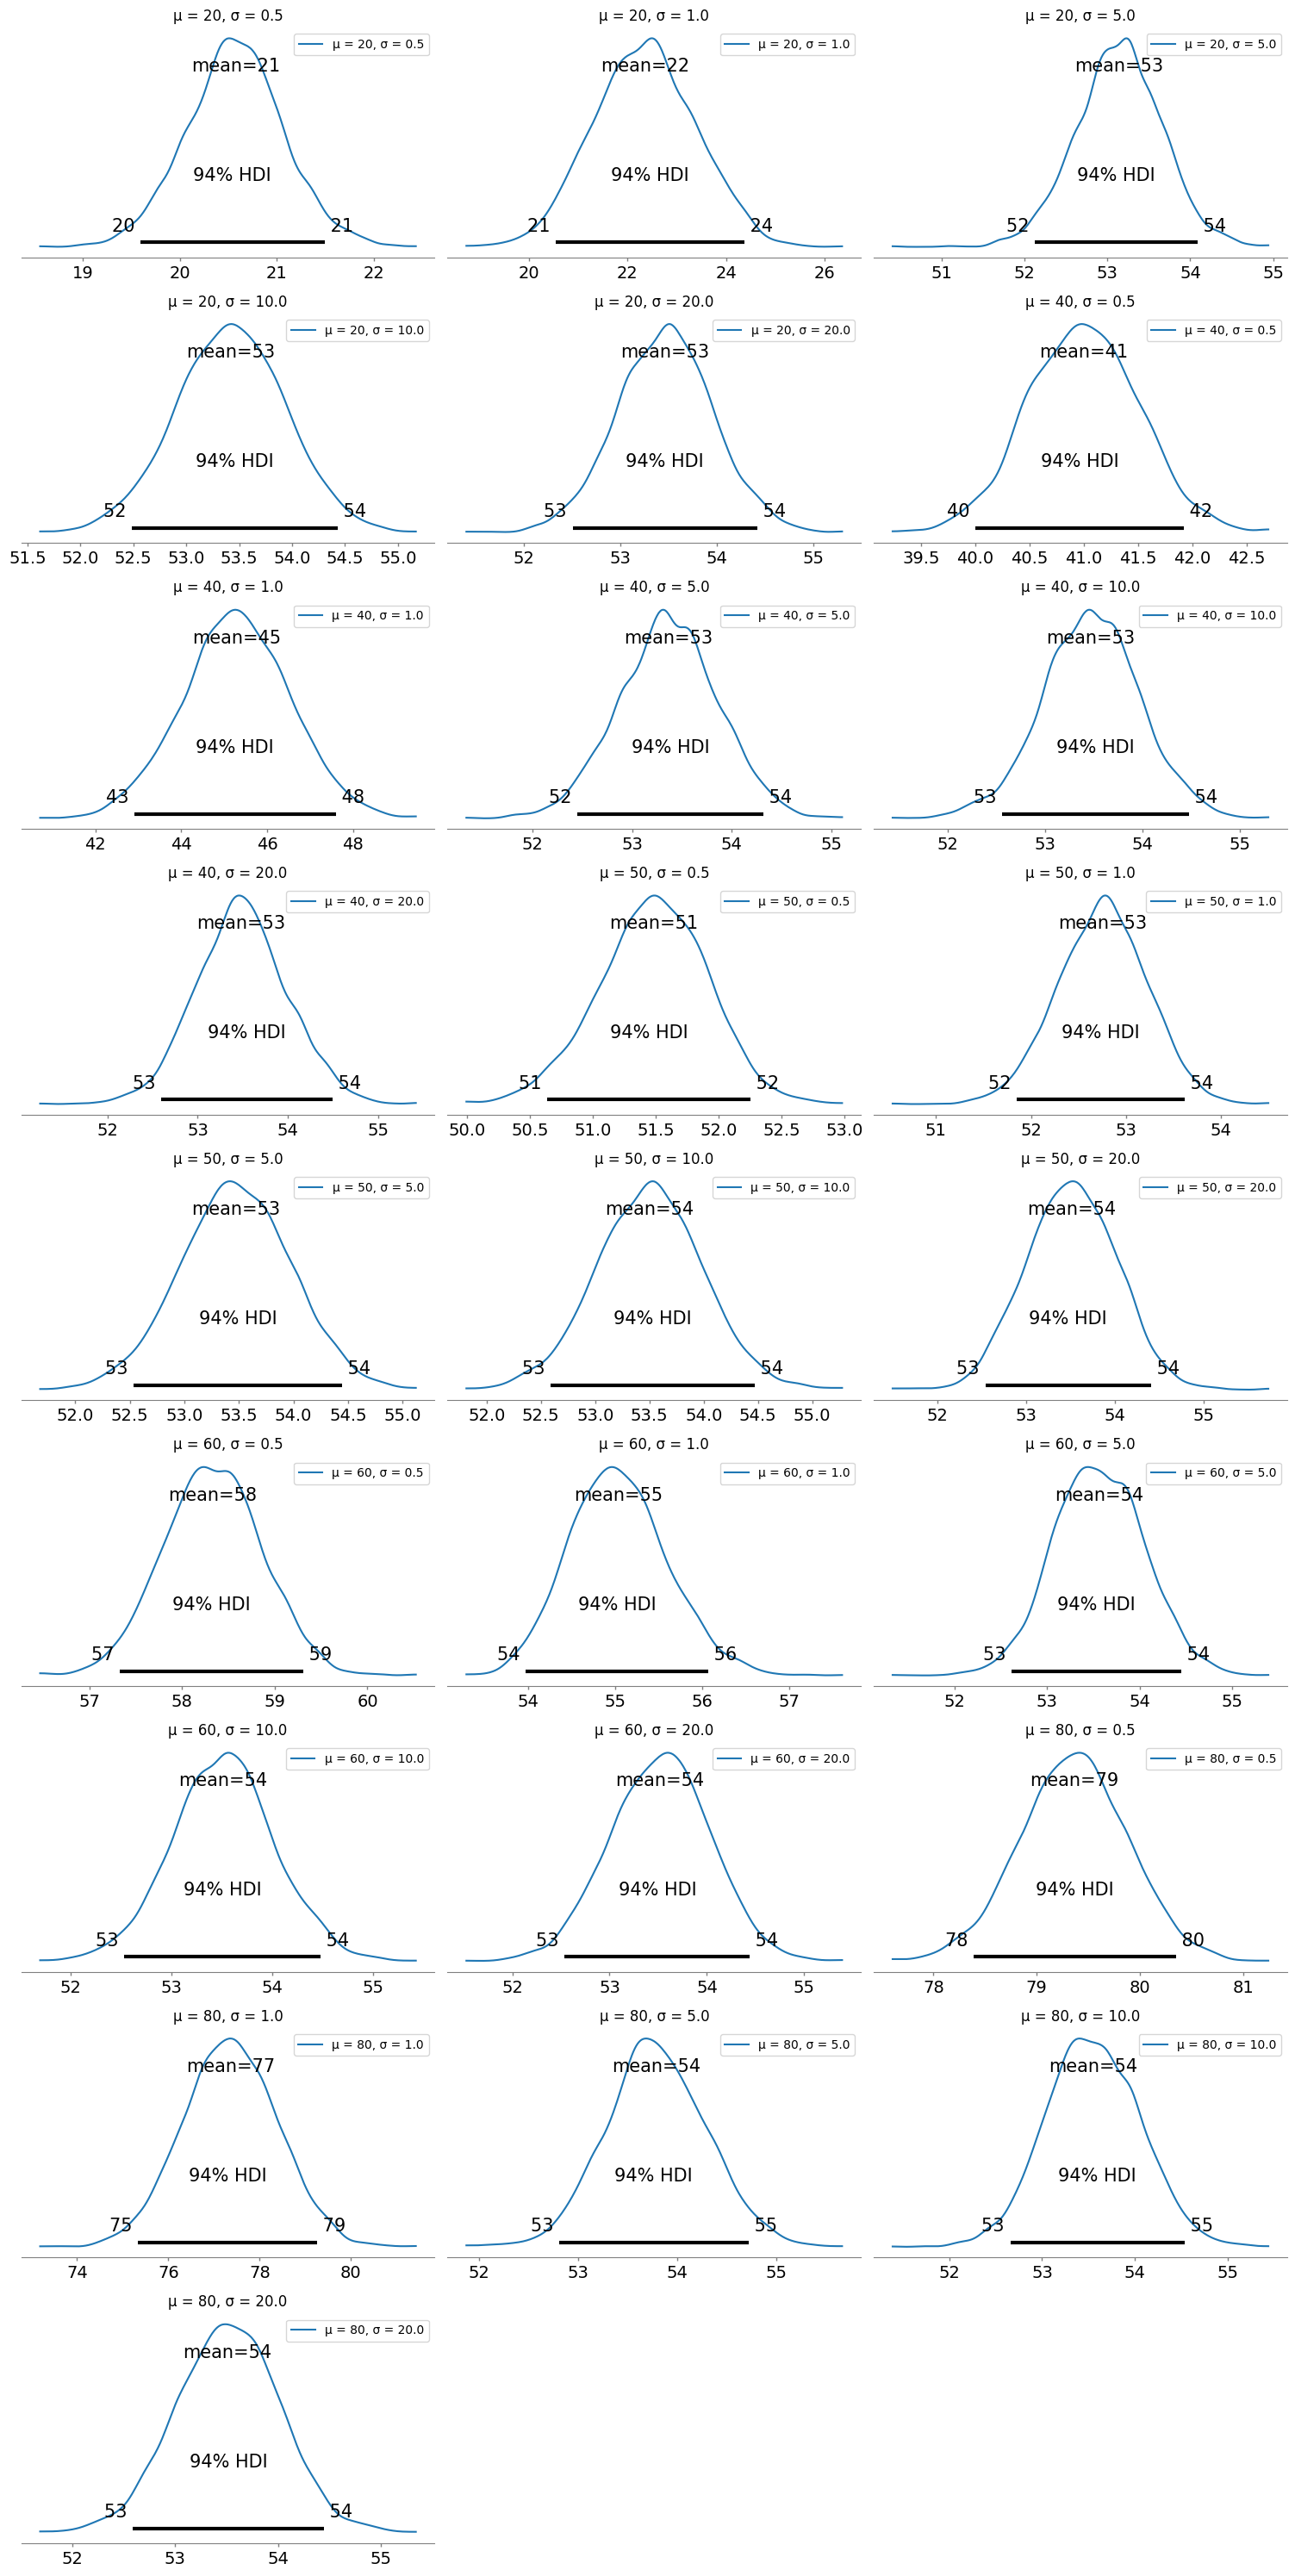

In [30]:
# Plot the results in a 9x3 grid
fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(15, 30))

# Flatten axes for easier indexing
axes = axes.flatten()

# Iterate over the results and plot each posterior with legend
for i, (mu, sigma, idata_g) in enumerate(zip(
        np.repeat(mean_values, len(std_values)),
        np.tile(std_values, len(mean_values)),
        results)):

    # Plot the posterior for μ
    az.plot_posterior(idata_g, var_names=['μ'], ax=axes[i], hdi_prob=0.94)

    # Set title for the subplot
    axes[i].set_title(f"μ = {mu}, σ = {sigma}")

    # Add legend with mean and std values
    axes[i].legend([f"μ = {mu}, σ = {sigma}"], loc='upper right')

# Hide empty subplots (the last row will only have one plot)
for ax in axes[len(results):]:
    ax.axis('off')

# Adjust the layout
plt.tight_layout()
plt.show()


# Exercise 6: Empirical mean and std

In [32]:
mean, std = data.mean(), data.std()

In [33]:
data_no_outlier = data[(data > mean - 1.5 * std) & (data < mean + 1.5 * std)]

In [34]:
mean_no_outlier, std_no_outlier = data_no_outlier.mean(), data_no_outlier.std()

In [35]:
print(mean, std)
print(mean_no_outlier, std_no_outlier)

53.49645833333333 3.4200063898474258
53.068888888888885 2.0744297446363658


In [36]:
# the two models
with pm.Model() as model_g:
    μ = pm.Uniform('μ', lower=40, upper=70)
    σ = pm.HalfNormal('σ', sigma=5)
    Y = pm.Normal('Y', mu=μ, sigma=σ, observed=data)
    idata_g = pm.sample(random_seed=4591)
    
with pm.Model() as model_t:
    μ = pm.Uniform('μ', 40, 75)
    σ = pm.HalfNormal('σ', sigma=10)
    ν = pm.Exponential('ν', 1/30)
    y = pm.StudentT('y', nu=ν, mu=μ, sigma=σ, observed=data)
    idata_t = pm.sample(random_seed=4591)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ, ν]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.


In [38]:
posterior_predictive_g = pm.sample_posterior_predictive(idata_g, model=model_g, var_names=["Y"], random_seed=123)
posterior_predictive_t = pm.sample_posterior_predictive(idata_t, model=model_t, var_names=["y"], random_seed=123)

Sampling: [Y]


Sampling: [y]


In [55]:
posterior_predictive_g

Inference data with groups:
	> posterior_predictive
	> observed_data

In [62]:
np.mean(posterior_predictive_g.posterior_predictive['Y'].values), np.std(posterior_predictive_g.posterior_predictive['Y'].values)

(53.501449785719316, 3.5854755088772876)

In [64]:
np.mean(posterior_predictive_t.posterior_predictive['y'].values), np.std(posterior_predictive_t.posterior_predictive['y'].values)

(53.01802691963164, 6.333806880351834)

# Exercise 7: Chemical shifts with more outliers